In [70]:
'''
    Fully linear test case
    
    u_t = 4 * u_x + f
'''

from fenics import *
# Timestepping
T = 200.0
n_steps = 100
dt = T/n_steps
NOAA_p = 0.5

#create mesh
nx = 100
ny = 100
mesh = UnitSquareMesh(nx,ny)

alpha = 2
beta = 2
gamma = 1

#Function Space
Omega = FunctionSpace(mesh, "P", 1)

u_D = Expression("alpha * x[0] + beta * x[1] + gamma * t",
                degree=1,alpha=alpha, beta=beta, gamma=gamma, t=0)

u_0 = Expression("P + x[0]*(1 - x[0])*x[1]*(1 - x[1])",
                degree=2,P=NOAA_p)
# Boundary Conditions
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(Omega, Constant(NOAA_p), boundary)


# Define init value
u_n = interpolate(u_0, Omega)

# Define variational problem
u = Function(Omega)
v = TestFunction(Omega)

f = Expression("gamma - 4*alpha", degree=2, alpha=alpha, gamma=gamma, u_D=u_D, u_n=u_n, dt=dt)
    
grad_term = 4*dot(Constant((1,0)),grad(u))*v*dt

# dx MUST GO AT THE END. 
# Putting dt at the end changes the type
F = u*v*dx - u_n*v*dx - grad_term*dx - f*v*dt*dx


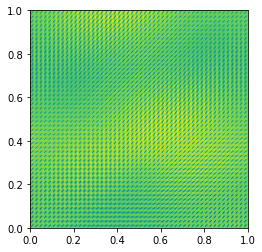

In [71]:
import matplotlib.pyplot as plt

t = 0

params = {
    "newton_solver" : {
        "preconditioner":"ilu"
    }
}
for n in range(n_steps):
    
    #solve at this timestep
    solve(F == 0, u, bc)
    plot(u)
    
    # update time
    t += dt
    u_D.t = t
    f.t = t
    u_n.assign(u)
    
plt.show()

In [100]:
'''
    Semilinear test case.
    
    u_t = 4 * u_x + u^2 + f
'''

from fenics import *
# Timestepping
T = 20.0
n_steps = 5
dt = T/n_steps

#create mesh
nx = 100
ny = 100
mesh = UnitSquareMesh(nx,ny)

alpha = 2
beta = 2
gamma = 1
NOAA_p = 0.5

#Function Space
Omega = FunctionSpace(mesh, "P", 1)

u_D = Expression("alpha * x[0] + beta * x[1] + gamma * t",
                degree=1,alpha=alpha, beta=beta, gamma=gamma, t=0)

u_0 = Expression("P + x[0]*(1 - x[0])*x[1]*(1 - x[1]) * sin(5 * x[0])",
                degree=2,P=NOAA_p)

# Boundary Conditions
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(Omega, Constant(NOAA_p), boundary)


# Define init value
u_n = interpolate(u_0, Omega)

# Define variational problem
u = Function(Omega)
v = TestFunction(Omega)

#f = Expression("-4*alpha/(ud*ud) - un/(ud*ud*deltat) + 1/(ud*deltat)", degree=2, ud=u_D, un=u_n, deltat=dt, alpha=alpha)
f = Expression("4 * (2*x[0] - 1) * x[1] * (1-x[1]) - u_0 * u_0", 
               degree=2, u_0=u_0)
    
grad_term = 4*dot(Constant((1,0)),grad(u))*v*dt

# dx MUST GO AT THE END. 
# Putting dt at the end changes the type
F = u*v*dx - u_n*v*dx - u*u*v*dt*dx - grad_term*dx - f*v*dt*dx


In [86]:
print(parameters)

In [107]:
import matplotlib.pyplot as plt

t = 0

params = {
    "newton_solver" : {
        "preconditioner":"ilu"
    }
}

prob = NonlinearVariationalProblem(F, u, bc)
solver = NonlinearVariationalSolver(prob)

prm = solver.parameters
prm["nonlinear_solver"] = "snes"

for n in range(n_steps):
    
    prob = NonlinearVariationalProblem(F, u, bc)
    solver = NonlinearVariationalSolver(prob)

    prm = solver.parameters
    prm["nonlinear_solver"] = "snes"
    #solve at this timestep
    solver.solve()
    plot(u)
    
    # update time
    t += dt
    u_D.t = t
    f.t = t
    u_n.assign(u)
    
plt.show()


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to solve nonlinear variational problem.
*** Reason:  The Jacobian form has not been defined.
*** Where:   This error was encountered inside NonlinearVariationalSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  unknown
*** -------------------------------------------------------------------------


In [106]:
prm = solver.parameters
prm["newton_solver"]
info(prm, True)
prm["nonlinear_solver"] = "snes"

In [44]:
'''
    Quasilinear test case.
    
    u_t = 4 * u_x * u^2 + f
    
'''

from fenics import *
# Timestepping
T = 20.0
n_steps = 5
dt = T/n_steps

#create mesh
nx = 100
ny = 100
mesh = UnitSquareMesh(nx,ny)

alpha = 2
beta = 2
gamma = 1
NOAA_p = 0.5

#Function Space
Omega = FunctionSpace(mesh, "P", 1)

u_D = Expression("alpha * x[0] + beta * x[1] + gamma * t",
                degree=1,alpha=alpha, beta=beta, gamma=gamma, t=0)


# Boundary Conditions
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(Omega, Constant(NOAA_p), boundary)


# Define init value
u_n = interpolate(u_D, Omega)

# Define variational problem
u = Function(Omega)
v = TestFunction(Omega)

#f = Expression("-4*alpha/(ud*ud) - un/(ud*ud*deltat) + 1/(ud*deltat)", degree=2, ud=u_D, un=u_n, deltat=dt, alpha=alpha)
f = Expression("gamma - 4*alpha * (alpha*x[0] + beta*x[1] + gamma*t)", 
               degree=2, alpha=alpha, beta=beta, gamma=gamma, t=0)
    
grad_term = 4*dot(Constant((1,0)),grad(u))*v*dt

# dx MUST GO AT THE END. 
# Putting dt at the end changes the type
F = u*v*dx - u_n*v*dx - u*grad_term*dx #- f*v*dt*dx


In [45]:
import matplotlib.pyplot as plt

t = 0

params = {
    "newton_solver" : {
        "preconditioner":"ilu"
    }
}
for n in range(n_steps):
    
    #solve at this timestep
    solve(F == 0, u, bc)
    plot(u)
    
    # update time
    t += dt
    u_D.t = t
    f.t = t
    u_n.assign(u)
    
plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to solve nonlinear system with NewtonSolver.
*** Reason:  Newton solver did not converge because maximum number of iterations reached.
*** Where:   This error was encountered inside NewtonSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  unknown
*** -------------------------------------------------------------------------


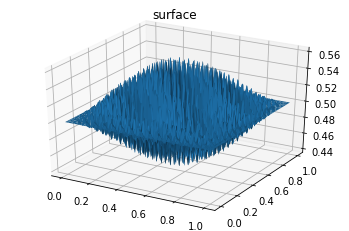

In [99]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,700)
y = np.linspace(0,1,700)

def f(x,y):
    p = 0
    a = 0.5
    freq = 100
    return a + (p+x)*(p+1-x)*(p+y)*(p+1-y) * np.sin(freq*x) * np.sin(freq*y)


X, Y = np.meshgrid(x, y)
Z = f(X,Y)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)#, cmap='viridis')
ax.set_title('surface');



In [56]:
ax.contour3D

AttributeError: 'AxesSubplot' object has no attribute 'contour3D'